In [1]:
import pandas as pd
import numpy as np

# estas son pa pintar
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# para el tiempo
import datetime

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
df_matriculas = pd.read_csv("../DATA/datos_universidades/df_super_murcia.csv", index_col = 0)
df_selectividad = pd.read_csv("../DATA/selectividad/dt_selectividad_murcia.csv", index_col = 0)
df_ine = pd.read_csv("../DATA/ine/df_ine_murcia_limpio.csv", index_col = 0)
df_mat_ine=pd.read_csv("../sql/sql_mezcla.csv", index_col = 0)



In [3]:
df_matriculas = df_matriculas.reset_index(drop=False)
df_matriculas['genero'] = df_matriculas['genero'].replace('ambos_sexos', 'ambos sexos')
df_matriculas

,matriculas,año,genero,universidad_tipo,formato,facultad
0,4725.0,2015-2016,ambos sexos,ambas,ambos_formatos,Ciencias Sociales y Jurídicas
1,4809.0,2016-2017,ambos sexos,ambas,ambos_formatos,Ciencias Sociales y Jurídicas
2,4474.0,2017-2018,ambos sexos,ambas,ambos_formatos,Ciencias Sociales y Jurídicas
3,4811.0,2018-2019,ambos sexos,ambas,ambos_formatos,Ciencias Sociales y Jurídicas
4,4831.0,2019-2020,ambos sexos,ambas,ambos_formatos,Ciencias Sociales y Jurídicas
5,4742.0,2020-2021,ambos sexos,ambas,ambos_formatos,Ciencias Sociales y Jurídicas
6,1395.0,2021-2022,ambos sexos,ambas,ambos_formatos,Ciencias Sociales y Jurídicas
7,1335.0,2015-2016,ambos sexos,ambas,ambos_formatos,Ingeniería y Arquitectura
8,1195.0,2016-2017,ambos sexos,ambas,ambos_formatos,Ingeniería y Arquitectura
9,1298.0,2017-2018,ambos sexos,ambas,ambos_formatos,Ingeniería y Arquitectura


In [4]:
df_matriculas['año_genero'] = df_matriculas['año'].astype(str) + '_' + df_matriculas['genero'].astype(str)
df_matriculas.head()

,matriculas,año,genero,universidad_tipo,formato,facultad,año_genero
0,4725.0,2015-2016,ambos sexos,ambas,ambos_formatos,Ciencias Sociales y Jurídicas,2015-2016_ambos sexos
1,4809.0,2016-2017,ambos sexos,ambas,ambos_formatos,Ciencias Sociales y Jurídicas,2016-2017_ambos sexos
2,4474.0,2017-2018,ambos sexos,ambas,ambos_formatos,Ciencias Sociales y Jurídicas,2017-2018_ambos sexos
3,4811.0,2018-2019,ambos sexos,ambas,ambos_formatos,Ciencias Sociales y Jurídicas,2018-2019_ambos sexos
4,4831.0,2019-2020,ambos sexos,ambas,ambos_formatos,Ciencias Sociales y Jurídicas,2019-2020_ambos sexos


In [5]:
df_ine = df_ine.reset_index(drop=False)
df_ine = df_ine.apply(lambda x: x.astype(str).str.lower())
df_ine['año_genero'] = df_ine['Periodo'].astype(str) + '_' + df_ine['Sexo'].astype(str)

df_ine

,Sexo,Tasas,Periodo,Total,año_genero
0,mujeres,tasa de empleo de la población,2012-2013,38.045,2012-2013_mujeres
1,mujeres,tasa de empleo de la población,2013-2014,38.2175,2013-2014_mujeres
2,mujeres,tasa de empleo de la población,2014-2015,36.785,2014-2015_mujeres
3,mujeres,tasa de empleo de la población,2015-2016,37.9875,2015-2016_mujeres
4,mujeres,tasa de empleo de la población,2016-2017,40.2875,2016-2017_mujeres
5,mujeres,tasa de empleo de la población,2017-2018,41.1425,2017-2018_mujeres
6,mujeres,tasa de empleo de la población,2018-2019,42.0475,2018-2019_mujeres
7,mujeres,tasa de empleo de la población,2019-2020,41.75,2019-2020_mujeres
8,mujeres,tasa de empleo de la población,2020-2021,42.35,2020-2021_mujeres
9,mujeres,tasa de empleo de la población,2021-2022,45.3725,2021-2022_mujeres


In [6]:
df_ine_mat = df_ine.merge(df_matriculas, on='año_genero')
df_ine_mat.head()

,Sexo,Tasas,Periodo,Total,año_genero,matriculas,año,genero,universidad_tipo,formato,facultad
0,mujeres,tasa de empleo de la población,2015-2016,37.9875,2015-2016_mujeres,2733.0,2015-2016,mujeres,ambas,ambos_formatos,Ciencias Sociales y Jurídicas
1,mujeres,tasa de empleo de la población,2015-2016,37.9875,2015-2016_mujeres,239.0,2015-2016,mujeres,ambas,ambos_formatos,Ingeniería y Arquitectura
2,mujeres,tasa de empleo de la población,2015-2016,37.9875,2015-2016_mujeres,599.0,2015-2016,mujeres,ambas,ambos_formatos,Artes y Humanidades
3,mujeres,tasa de empleo de la población,2015-2016,37.9875,2015-2016_mujeres,1677.0,2015-2016,mujeres,ambas,ambos_formatos,Ciencias de la Salud
4,mujeres,tasa de empleo de la población,2015-2016,37.9875,2015-2016_mujeres,353.0,2015-2016,mujeres,ambas,ambos_formatos,Ciencias


In [7]:
df_ine_mat = df_ine_mat.drop(['Sexo', 'año_genero', 'Periodo'], axis=1)

In [8]:
df_ine_mat

,Tasas,Total,matriculas,año,genero,universidad_tipo,formato,facultad
0,tasa de empleo de la población,37.9875,2733.0,2015-2016,mujeres,ambas,ambos_formatos,Ciencias Sociales y Jurídicas
1,tasa de empleo de la población,37.9875,239.0,2015-2016,mujeres,ambas,ambos_formatos,Ingeniería y Arquitectura
2,tasa de empleo de la población,37.9875,599.0,2015-2016,mujeres,ambas,ambos_formatos,Artes y Humanidades
3,tasa de empleo de la población,37.9875,1677.0,2015-2016,mujeres,ambas,ambos_formatos,Ciencias de la Salud
4,tasa de empleo de la población,37.9875,353.0,2015-2016,mujeres,ambas,ambos_formatos,Ciencias
5,tasa de empleo de la población,37.9875,2733.0,2015-2016,mujeres,ambas,presencial,Ciencias Sociales y Jurídicas
6,tasa de empleo de la población,37.9875,239.0,2015-2016,mujeres,ambas,presencial,Ingeniería y Arquitectura
7,tasa de empleo de la población,37.9875,599.0,2015-2016,mujeres,ambas,presencial,Artes y Humanidades
8,tasa de empleo de la población,37.9875,1677.0,2015-2016,mujeres,ambas,presencial,Ciencias de la Salud
9,tasa de empleo de la población,37.9875,353.0,2015-2016,mujeres,ambas,presencial,Ciencias


In [9]:
df_filtered = df_ine_mat[df_ine_mat['universidad_tipo'] == 'ambas']
df_filtered2 = df_filtered[df_filtered['formato'] == 'ambos_formatos']

In [10]:
df_filtered2

,Tasas,Total,matriculas,año,genero,universidad_tipo,formato,facultad
0,tasa de empleo de la población,37.9875,2733.0,2015-2016,mujeres,ambas,ambos_formatos,Ciencias Sociales y Jurídicas
1,tasa de empleo de la población,37.9875,239.0,2015-2016,mujeres,ambas,ambos_formatos,Ingeniería y Arquitectura
2,tasa de empleo de la población,37.9875,599.0,2015-2016,mujeres,ambas,ambos_formatos,Artes y Humanidades
3,tasa de empleo de la población,37.9875,1677.0,2015-2016,mujeres,ambas,ambos_formatos,Ciencias de la Salud
4,tasa de empleo de la población,37.9875,353.0,2015-2016,mujeres,ambas,ambos_formatos,Ciencias
45,tasa de paro de la población,27.6425,2733.0,2015-2016,mujeres,ambas,ambos_formatos,Ciencias Sociales y Jurídicas
46,tasa de paro de la población,27.6425,239.0,2015-2016,mujeres,ambas,ambos_formatos,Ingeniería y Arquitectura
47,tasa de paro de la población,27.6425,599.0,2015-2016,mujeres,ambas,ambos_formatos,Artes y Humanidades
48,tasa de paro de la población,27.6425,1677.0,2015-2016,mujeres,ambas,ambos_formatos,Ciencias de la Salud
49,tasa de paro de la población,27.6425,353.0,2015-2016,mujeres,ambas,ambos_formatos,Ciencias


In [11]:
df_filtered2.loc[:, 'Total'] = pd.to_numeric(df_filtered2['Total'], errors='coerce')
df_filtered2.loc[:, 'matriculas'] = pd.to_numeric(df_filtered2['matriculas'], errors='coerce')

In [12]:

df_result = df_filtered2.groupby(["año", "genero", "Tasas"]).agg({"Total": "first", "matriculas": "sum"}).reset_index()

In [13]:
df_result.head()

,año,genero,Tasas,Total,matriculas
0,2015-2016,ambos sexos,tasa de actividad,59.1525,10132.0
1,2015-2016,ambos sexos,tasa de empleo de la población,44.815,10132.0
2,2015-2016,ambos sexos,tasa de paro de la población,21.015,10132.0
3,2015-2016,hombres,tasa de actividad,67.4675,4531.0
4,2015-2016,hombres,tasa de empleo de la población,54.9775,4531.0


In [14]:
df_filtered3 = df_result[df_result['Tasas'] == 'tasa de paro de la población']

In [15]:
df_filtered4 = df_filtered3[df_filtered3['genero'] == 'ambos sexos']
df_filtered4.loc[:, 'Total'] = pd.to_numeric(df_filtered4['Total'], errors='coerce')
df_filtered4.loc[:, 'matriculas'] = pd.to_numeric(df_filtered4['matriculas'], errors='coerce')
df_filtered4.dtypes

año           object
genero        object
Tasas         object
Total         object
matriculas    object
dtype: object

ValueError: could not convert string to float: 'tasa de paro de la población'

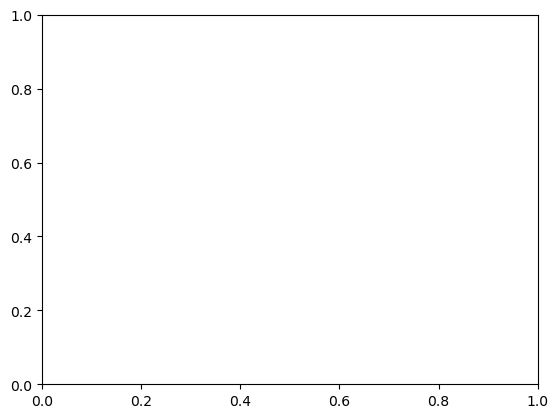

In [16]:
from sklearn.preprocessing import MinMaxScaler

# Crear una figura y un eje Y
fig, ax1 = plt.subplots()

# Excluir la primera fila que contiene el encabezado
df_filtered4 = df_filtered4.iloc[1:]

# Normalizar los datos de la tasa de paro
scaler = MinMaxScaler()
tasas_norm = scaler.fit_transform(df_filtered4['Tasas'].values.reshape(-1, 1))

# Graficar los datos normalizados en el primer eje Y
ax1.plot(df_filtered4['año'], tasas_norm, color='blue')
ax1.set_xlabel('año')
ax1.set_ylabel('Tasas normalizadas', color='blue')

# Crear un segundo eje Y
ax2 = ax1.twinx()

# Graficar el total de matrículas en el segundo eje Y
ax2.plot(df_filtered4['año'], df_filtered4['matriculas'], color='red')
ax2.set_ylabel('matrículas', color='red')

# Mostrar el gráfico
plt.show()
